In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
import logging
import warnings
warnings.filterwarnings('ignore')

from prophet import Prophet
logging.getLogger('prophet').setLevel(logging.WARNING)

In [15]:
train_data = pd.read_csv('data/train.csv', parse_dates=['date'])
test_data = pd.read_csv('data/test.csv', parse_dates=['date'])

In [16]:
train_data.index = train_data['date']
train_data[train_data['store'] == 1]

,date,store,item,sales
date,,,,
2013-01-01,2013-01-01,1,1,13
2013-01-02,2013-01-02,1,1,11
2013-01-03,2013-01-03,1,1,14
2013-01-04,2013-01-04,1,1,13
2013-01-05,2013-01-05,1,1,10
...,...,...,...,...
2017-12-27,2017-12-27,1,50,38
2017-12-28,2017-12-28,1,50,52
2017-12-29,2017-12-29,1,50,59


In [6]:
store_data = train_data[train_data['store'] == 1]
store_data[store_data['item'] == 1]

,date,store,item,sales
date,,,,
2013-01-01,2013-01-01,1,1,13
2013-01-02,2013-01-02,1,1,11
2013-01-03,2013-01-03,1,1,14
2013-01-04,2013-01-04,1,1,13
2013-01-05,2013-01-05,1,1,10
...,...,...,...,...
2017-12-27,2017-12-27,1,1,14
2017-12-28,2017-12-28,1,1,19
2017-12-29,2017-12-29,1,1,15


## prophet 모델링

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train = train_data[train_data['date'] < '2017-01-01']
val_data = train_data[train_data['date'] >= '2017-01-01']


In [19]:
train

,date,store,item,sales
date,,,,
2013-01-01,2013-01-01,1,1,13
2013-01-02,2013-01-02,1,1,11
2013-01-03,2013-01-03,1,1,14
2013-01-04,2013-01-04,1,1,13
2013-01-05,2013-01-05,1,1,10
...,...,...,...,...
2016-12-27,2016-12-27,10,50,60
2016-12-28,2016-12-28,10,50,43
2016-12-29,2016-12-29,10,50,68


In [51]:
item1 = train[train['item'] == 1]
item1['y'] = item1['sales']
item1['ds'] = item1['date']
store_dfs = {store: item1[item1['store'] == store] for store in item1['store'].unique()}

In [62]:
item1_val = val_data[val_data['item'] == 1]
store_dfs_val = {store: item1_val[item1_val['store'] == store] for store in item1_val['store'].unique()}

In [52]:
from prophet import Prophet
m = Prophet()

In [53]:
m.fit(store_dfs[1])

22:45:41 - cmdstanpy - INFO - Chain [1] start processing
22:45:41 - cmdstanpy - INFO - Chain [1] done processing


In [63]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1821,2017-12-27
1822,2017-12-28
1823,2017-12-29
1824,2017-12-30
1825,2017-12-31


In [80]:
val_data.index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='date', length=182500, freq=None)

In [82]:
forecast = m.predict(future)
val_pred = forecast.iloc[-365:]['yhat']
val_pred.index = val_data.index.unique()

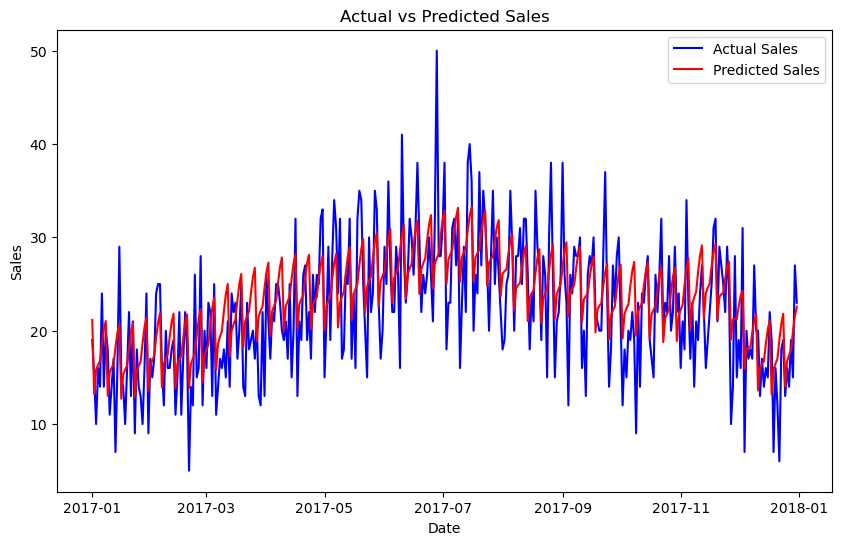

In [85]:
store_dfs_val[1]['y_hat'] = val_pred
store_dfs_val[1]

plt.figure(figsize=(10, 6))
plt.plot(store_dfs_val[1].index, store_dfs_val[1]['sales'], label='Actual Sales', color='blue')
plt.plot(store_dfs_val[1].index, store_dfs_val[1]['y_hat'], label='Predicted Sales', color='red')
plt.legend()
plt.title('Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

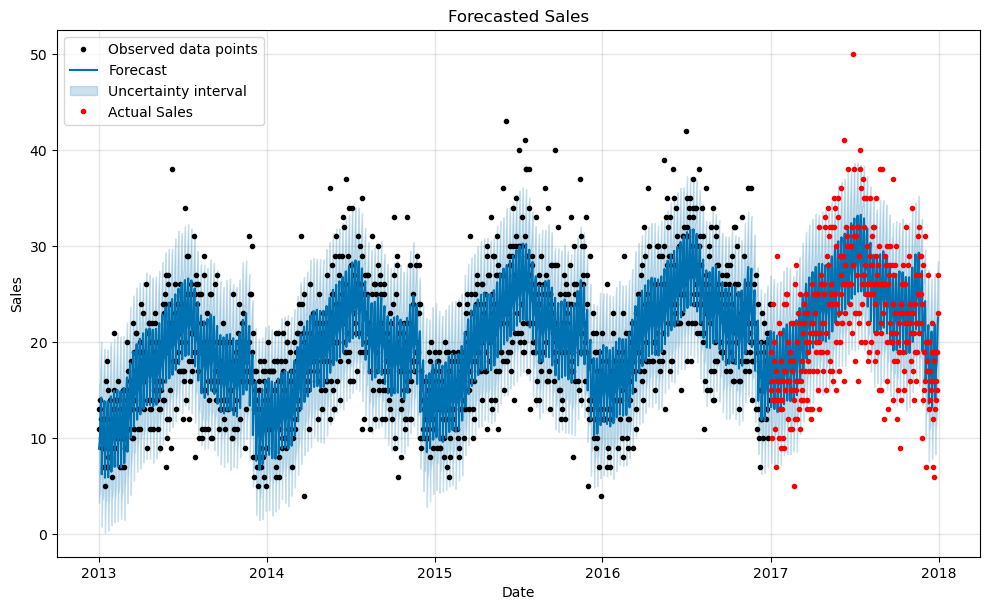

In [96]:
fig = m.plot(forecast)
plt.title('Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')

plt.plot(store_dfs_val[1].index, store_dfs_val[1]['sales'], 'ro', label='Actual Sales', markersize=3)
plt.legend()
plt.show()